In [1]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

pd.set_option('display.max_rows', None)

# read in the data

df = pd.read_csv('/Users/annechen/Downloads/movies.csv')

In [2]:
# data preview

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# checking missing data

for col in df.columns:
    null_count = df[col].isnull().sum()
    print(f'{col} - {null_count}')

name - 0
rating - 77
genre - 0
year - 0
released - 2
score - 3
votes - 3
director - 0
writer - 3
star - 1
country - 3
budget - 2171
gross - 189
company - 17
runtime - 4


In [4]:
# remove data with null values in budget and gross columns
df = df.dropna(subset=['budget', 'gross'])

In [5]:
for col in df.columns:
    null_count = df[col].isnull().sum()
    print(f'{col} - {null_count}')

name - 0
rating - 12
genre - 0
year - 0
released - 0
score - 0
votes - 0
director - 0
writer - 0
star - 0
country - 1
budget - 0
gross - 0
company - 2
runtime - 1


In [6]:
# column data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# changing column data types for budget, gross, and votes in order to get rid of trailing 0

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [8]:
# create correct year column from the released column

df[['date_released', 'temp']] = df['released'].str.split('(', expand=True)
df['correct_year'] = df['date_released'].str[-5:]
df = df.drop('temp', axis=1)

In [9]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [18]:
# drop any duplicates

df = df.drop_duplicates()

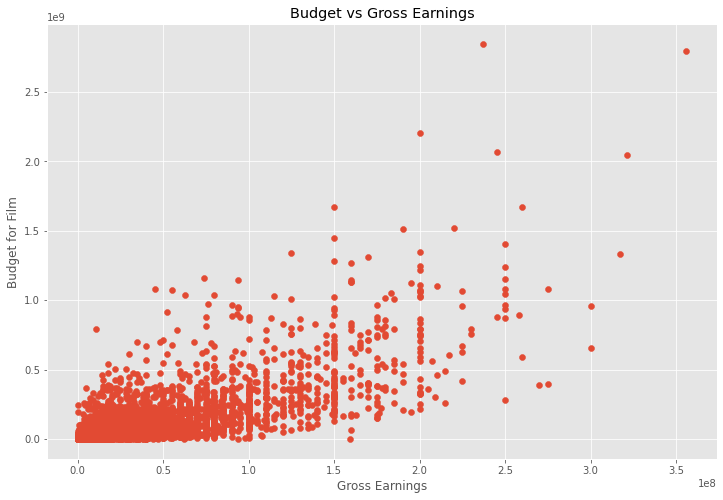

In [19]:
# scatter plot with budget vs gross revenue

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

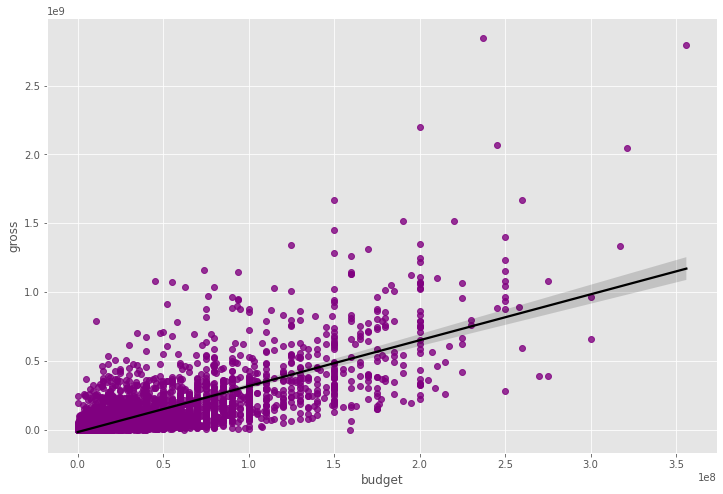

In [12]:
# regression plot for budget vs gross 
palette = sns.color_palette("bright", 2)

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'purple'}, line_kws={'color': 'black'})

In [13]:
# using default method which is Pearson
# seeing high correlation between budget and gross

df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

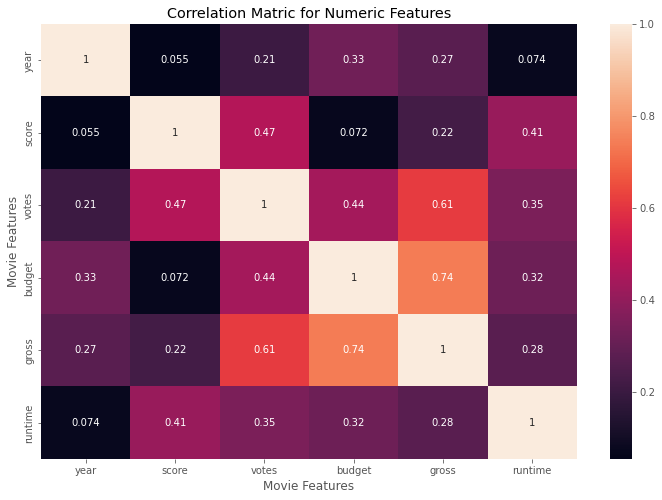

In [14]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show

In [15]:
# assigning a numeric identify to each field

df_numerized = df

for col in df_numerized.columns:
    if df_numerized[col].dtype == 'object':
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes

<function matplotlib.pyplot.show(close=None, block=None)>

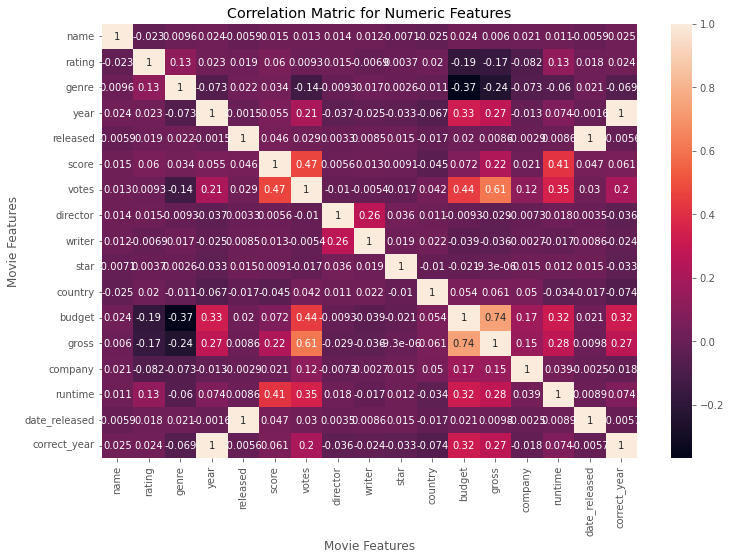

In [16]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show

In [17]:
corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross          votes            0.614904
votes          gross            0.614904
budget         gross            0.740395
gross          budget           0.740395
year           correct_year     0.998641
correct_year   year             0.998641
released       date_released    0.999950
date_released  released         0.999950
name           name             1.000000
writer         writer           1.000000
runtime        runtime          1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
date_released  date_released    1.000000
correct_year   c

In [ ]:
# votes and budget have the highest correlation to gross earnings